# Import Library

In [1]:
!pip install transformers rouge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00


In [3]:
#Import library yang dibutuhkan
import tarfile
import os
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Merge Data



In [ ]:
#Membuka dan mengekstrak dataset
file = tarfile.open("/content/drive/MyDrive/Skripsheet/Code/indosum.tar.gz")
file.extractall("/content/drive/MyDrive/Skripsheet/Code/")
file.close()

In [ ]:
#Mengurutkan nama file
filenames = []
path = "/content/drive/MyDrive/Skripsheet/Code/indosum"

filenames = os.listdir(path)
filenames.sort()

filenames

In [ ]:
#Mengambil data nama file
list_dev = filenames[2:7]
list_test = filenames[7:12]
list_train = filenames[12:]

print(list_dev, list_test, list_train)

In [ ]:
#Membuat fungsi untuk menggabungkan data berdasarkan file
def merge_data(df, file):
  for f in file:
    data = pd.read_json(path+"/"+f, lines=True)
    df.append(data)

In [ ]:
df_dev = []
df_train = []
df_test = []

#Menggabungkan data
merge_data(df_dev, list_dev)
merge_data(df_train, list_train)
merge_data(df_test, list_test)

#Membuat dataset dalam format dataframe
df_dev = pd.concat(df_dev, ignore_index=True)
df_train = pd.concat(df_train, ignore_index=True)
df_test = pd.concat(df_test, ignore_index=True)
df_test

In [ ]:
#Menyimpan dataset
df_dev.to_csv("/content/drive/MyDrive/Skripsheet/Code/indosum/dev.csv")
df_train.to_csv("/content/drive/MyDrive/Skripsheet/Code/indosum/train.csv")
df_test.to_csv("/content/drive/MyDrive/Skripsheet/Code/indosum/test.csv")

# Load Data

In [6]:
pd.set_option('display.max_colwidth',None)
train = pd.read_csv("/content/drive/MyDrive/Skripsheet/Code/indosum/train_uncleaned.csv")
train

,Unnamed: 0,index,paragraphs,summary,text_count
0,0,0,Jakarta CNN Indonesia Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari . Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu . Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia . Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat . Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit . Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah . Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia.com Jumat 4 8 . Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh . Dia juga tak tahu penyakit apa yang diderita Ryan . Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bisa dijenguk juga . Enggak tahu berat sekali apa bagaimana tutur Ryan . Walau sudah setahun menderita sakit Lula tak mengetahui apa penyebab pasti kematian Dr Oz Indonesia itu . Meski demikian ia mendengar beberapa kabar yang menyebut bahwa penyebab Ryan meninggal adalah karena jatuh di kamar mandi . Saya tidak tahu barangkali penyakit yang dulu sama yang sekarang berbeda atau penyebab kematiannya beda dari penyakit sebelumnya . Kita kan enggak bisa mengambil kesimpulan kata Lula . Ryan Thamrin terkenal sebagai dokter yang rutin membagikan tips dan informasi kesehatan lewat tayangan Dokter Oz Indonesia . Ryan menempuh Pendidikan Dokter pada tahun 2002 di Fakultas Kedokteran Universitas Gadjah Mada . Dia kemudian melanjutkan pendidikan Klinis Kesehatan Reproduksi dan Penyakit Menular Seksual di Mahachulalongkornrajavidyalaya University Bangkok Thailand pada 2004 .,Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan Thamrin menyebut kawannya itu sudah sakit sejak setahun yang lalu . Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia . Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat .,292
1,1,3,Merdeka.com Indonesia Corruption Watch ICW meminta Komisi Pemberantas Korupsi KPK ikut memantau perkembangan atas meninggalnya saksi kunci kasus mega korupsi e KTP Johannes Marliem . Peneliti ICW Divisi Hukum dan Monitoring Peradila Aradila Caesar mengatakan momentum meninggalnya saksi kunci tersebut menimbulkan kejanggalan dan tanda tanya besar . Orang meninggal kita kan tidak bisa prediksi itu bukan kuasa kita . Tapi kalau kita melihat momentum kan ada suatu kejanggalan . Kenapa momentum meninggalnya saat kasus e ktp sedang ditangani oleh KPK katanya seusai konferensi pers di Kantor Sekeretariatan ICW Jakarta Minggu13 8 . Pihak ICW meminta KPK turut menyelidiki kematian saksi kunci ini dan menjelaskan kepada masyarakat apakah ada keterkaitan dengan permasalahan korupsi e KTP atau halhal lain dibalik kematian Johannes . Kita minta KPK dan juga bekerja sama dengan pihak otoritas untuk menyelidiki kematian dari saksi kunci tersebut dengan serius . Artinya nanti KPK harus bisa menjelaskan kepada publik kenapa kematiannya pintanya . ICW berharap dengan kematian saksi kunci tidak membuat efek negatif untuk permasalahan kasus e KTP ini . Jangan sampai kematiannya berdampak negatif dalam konteks membongkar kasus e ktp tersebut pungkasnya . ded,Indonesia Corruption Watch ICW meminta Komisi Pemberantas Korupsi xa0 KPK ikut memantau perkembangan atas meninggalnya saksi kunci kasus mega xa0 korupsi xa0 e KTP Johannes Marliem dan menjelaskan kepada masyarakat apakah ada keterkaitan dengan permasalahan korupsi e KTP atau halhal lain dibalik kematian Johannes . Peneliti ICW Divisi Hukum dan Monitoring Peradila Aradila Caesar mengatakan momentum meninggalny

# EDA

In [9]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
print("TRAIN SET = Jumlah baris : %d; Jumlah kolom : %d" % train.shape)

TRAIN SET = Jumlah baris : 17454; Jumlah kolom : 4


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17454 entries, 0 to 17453
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       17454 non-null  int64 
 1   paragraphs  17454 non-null  object
 2   summary     17454 non-null  object
 3   text_count  17454 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 545.6+ KB


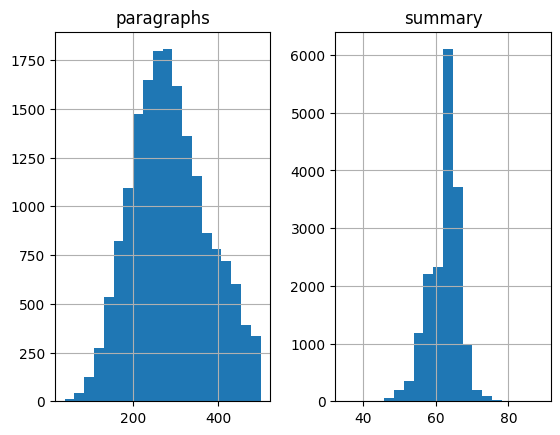

In [7]:
#Menghitung dan memvisualisasikan rata-rata panjang teks yang dimiliki oleh artikel berita dan ringkasan
text_count = []
summary_count = []

for sent in train['paragraphs']:
    text_count.append(len(sent.split()))

for sent in train['summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()

graph_df['paragraphs'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 20)
plt.show()

In [15]:
train.describe()

,index,text_count
count,17454.000000,17454.000000
mean,9402.764409,287.841297
std,5416.558506,88.991393
min,0.000000,40.000000
25%,4709.250000,223.000000
50%,9418.500000,281.000000
75%,14101.750000,348.000000
max,18772.000000,500.000000


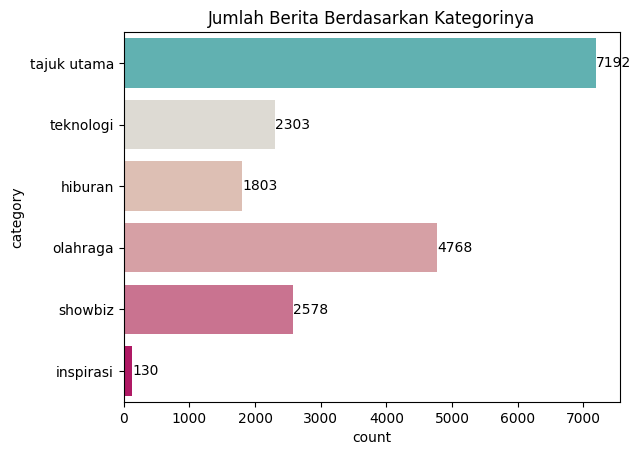

In [ ]:
category = df['category'].value_counts()
sns.set_palette(sns.color_palette(["#54bebe", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"]))
ax = sns.countplot(y ='category', data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Jumlah Berita Berdasarkan Kategorinya")
plt.savefig('category.png')
plt.show()

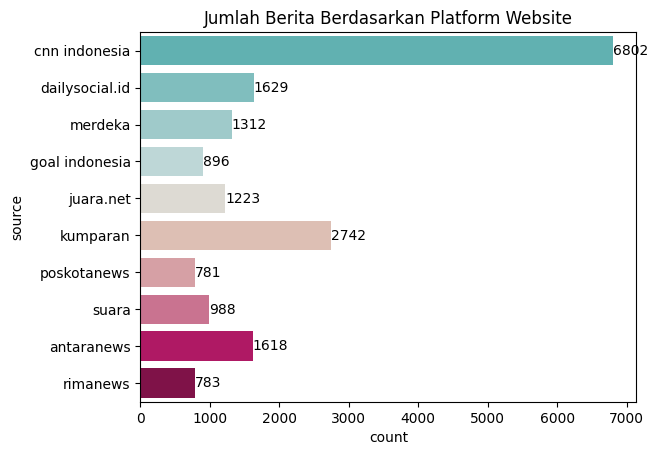

In [ ]:
source = df['source'].value_counts()
sns.set_palette(sns.color_palette(["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064", "#910048"]))
ax = sns.countplot(y ='source', data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Jumlah Berita Berdasarkan Platform Website")
plt.savefig('source.png')
plt.show()

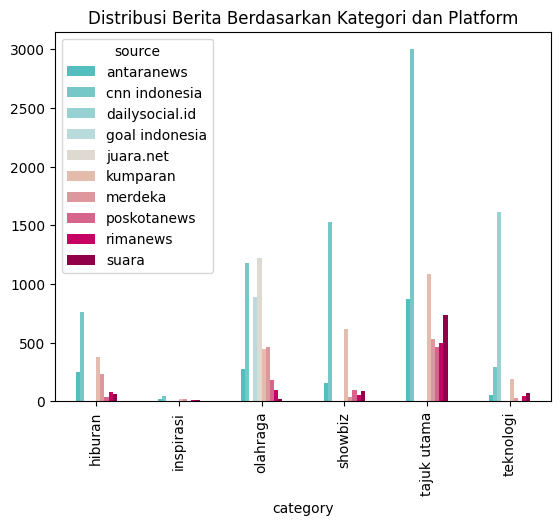

In [ ]:
source_category = df.groupby(['category', 'source']).size().unstack()
ax = source_category.plot(kind="bar")
plt.title("Distribusi Berita Berdasarkan Kategori dan Platform")
plt.savefig('source_category.png')
plt.show()

In [ ]:
d = pd.DataFrame(df.groupby(['category', 'source']).size())
d

0
category    source              
hiburan     antaranews       252
            cnn indonesia    761
            dailysocial.id     4
            goal indonesia     2
            juara.net          1
            kumparan         377
            merdeka          229
            poskotanews       37
            rimanews          76
            suara             64
inspirasi   antaranews        16
            cnn indonesia     42
            juara.net          2
            kumparan          21
            merdeka           16
            poskotanews        5
            rimanews          13
            suara             15
olahraga    antaranews       276
            cnn indonesia   1177
            goal indonesia   891
            juara.net       1218
            kumparan         447
            merdeka          463
            poskotanews      181
            rimanews          98
            suara             17
showbiz     antaranews       154
            cnn indonesia   1527
            dailysocial.id     2
            juara.net          1
            kumparan         620
            merdeka           41
            poskotanews       93
            rimanews          52
            suara             88
tajuk utama antaranews       869
            cnn indonesia   3000
            dailysocial.id     7
            goal indonesia     2
            juara.net          1
            kumparan        1088
            merdeka          532
            poskotanews      461
            rimanews         497
            suara            735
teknologi   antaranews        51
            cnn indonesia    295
            dailysocial.id  1616
            goal indonesia     1
            kumparan         189
            merdeka           31
            poskotanews        4
            rimanews          47
            suara             69

#Preprocessing


In [ ]:
#Menghapus data duplikat pada dataset
df_train = df_train.drop_duplicates('id', keep='first', ignore_index=True)
df_dev = df_dev.drop_duplicates('id', keep='first', ignore_index=True)
df_test = df_test.drop_duplicates('id', keep='first', ignore_index=True)

In [ ]:
#Proses praproses data (menghapus punctuation dan nama platform berita)
web = ["cnn indonesia", "merdeka.com", "antara news", "rimanews", "juara.net", "suara.com"]

def text_processing_fornopraroses(data):
  for i in range(0,len(data)):
    data[i] = re.sub(r'[^\w.\s]', '', data[i])

def text_processing_forpraroses(data):
  for i in range(0,len(data)):
    data[i] = re.sub(r'[^\w.\s]', '', data[i].lower())

    for w in web:
      if w in data[i]:
        data[i] = data[i].replace(w, "")


In [ ]:
text_processing_forpraroses(train["paragraphs"])
text_processing_forpraroses(train["summary"])

train

<ipython-input-22-cbe71d928129>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = re.sub(r'[^\w.\s]', '', data[i].lower())
<ipython-input-22-cbe71d928129>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].replace(w, "")


,Unnamed: 0,index,paragraphs,summary,text_count
0,0,0,jakarta dokter ryan thamrin yang terkenal lewat acara dokter oz indonesia meninggal dunia pada jumat 4 8 dini hari . dokter lula kamal yang merupakan selebriti sekaligus rekan kerja ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu . lula menuturkan sakit itu membuat ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara dokter oz indonesia . kondisi itu membuat ryan harus kembali ke kampung halamannya di pekanbaru riau untuk menjalani istirahat . setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit . karena sakitnya ia langsung pulang ke pekanbaru jadi kami yang mau jenguk juga susah . barangkali mau istirahat ya betul juga kalau di jakarta susah isirahatnya kata lula kepada cnnindonesia.com jumat 4 8 . lula yang mengenal ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk ryan lantaran lokasi yang jauh . dia juga tak tahu penyakit apa yang diderita ryan . itu saya enggak tahu belum sempat jenguk dan enggak selamanya bisa dijenguk juga . enggak tahu berat sekali apa bagaimana tutur ryan . walau sudah setahun menderita sakit lula tak mengetahui apa penyebab pasti kematian dr oz indonesia itu . meski demikian ia mendengar beberapa kabar yang menyebut bahwa penyebab ryan meninggal adalah karena jatuh di kamar mandi . saya tidak tahu barangkali penyakit yang dulu sama yang sekarang berbeda atau penyebab kematiannya beda dari penyakit sebelumnya . kita kan enggak bisa mengambil kesimpulan kata lula . ryan thamrin terkenal sebagai dokter yang rutin membagikan tips dan informasi kesehatan lewat tayangan dokter oz indonesia . ryan menempuh pendidikan dokter pada tahun 2002 di fakultas kedokteran universitas gadjah mada . dia kemudian melanjutkan pendidikan klinis kesehatan reproduksi dan penyakit menular seksual di mahachulalongkornrajavidyalaya university bangkok thailand pada 2004 .,dokter lula kamal yang merupakan selebriti sekaligus rekan kerja ryan thamrin menyebut kawannya itu sudah sakit sejak setahun yang lalu . lula menuturkan sakit itu membuat ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara dokter oz indonesia . kondisi itu membuat ryan harus kembali ke kampung halamannya di pekanbaru riau untuk menjalani istirahat .,292
1,1,3,indonesia corruption watch icw meminta komisi pemberantas korupsi kpk ikut memantau perkembangan atas meninggalnya saksi kunci kasus mega korupsi e ktp johannes marliem . peneliti icw divisi hukum dan monitoring peradila aradila caesar mengatakan momentum meninggalnya saksi kunci tersebut menimbulkan kejanggalan dan tanda tanya besar . orang meninggal kita kan tidak bisa prediksi itu bukan kuasa kita . tapi kalau kita melihat momentum kan ada suatu kejanggalan . kenapa momentum meninggalnya saat kasus e ktp sedang ditangani oleh kpk katanya seusai konferensi pers di kantor sekeretariatan icw jakarta minggu13 8 . pihak icw meminta kpk turut menyelidiki kematian saksi kunci ini dan menjelaskan kepada masyarakat apakah ada keterkaitan dengan permasalahan korupsi e ktp atau halhal lain dibalik kematian johannes . kita minta kpk dan juga bekerja sama dengan pihak otoritas untuk menyelidiki kematian dari saksi kunci tersebut dengan serius . artinya nanti kpk harus bisa menjelaskan kepada publik kenapa kematiannya pintanya . icw berharap dengan kematian saksi kunci tidak membuat efek negatif untuk permasalahan kasus e ktp ini . jangan sampai kematiannya berdampak negatif dalam konteks membongkar kasus e ktp tersebut pungkasnya . ded,indonesia corruption watch icw meminta komisi pemberantas korupsi xa0 kpk ikut memantau perkembangan atas meninggalnya saksi kunci kasus mega xa0 korupsi xa0 e ktp johannes marliem dan menjelaskan kepada masyarakat apakah ada keterkaitan dengan permasalahan korupsi e ktp atau halhal lain dibalik kematian johannes . peneliti icw divisi hukum dan monitoring peradila aradila caesar mengatakan momentum meninggalnya saksi kunci tersebut men

In [ ]:
#Melakukan split dataset
df_valid = train[13563:16954]
df_test = train[16954:]
df_train = train[:13563]

df_train.shape, df_valid.shape,df_test.shape

((13563, 5), (3391, 5), (500, 5))

In [ ]:
#Menambahkan token sostok dan eostok pada awal dan akhir ringkasan
df_train['summary'] = pd.Series(df_train['summary'].apply(lambda x: 'sostok ' + x + ' eostok'))
df_valid['summary'] = pd.Series(df_valid['summary'].apply(lambda x: 'sostok ' + x + ' eostok'))
df_test['summary'] = pd.Series(df_test['summary'].apply(lambda x: 'sostok ' + x + ' eostok'))

<ipython-input-25-fddd371b2469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['summary'] = pd.Series(df_train['summary'].apply(lambda x: 'sostok ' + x + ' eostok'))
<ipython-input-25-fddd371b2469>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['summary'] = pd.Series(df_valid['summary'].apply(lambda x: 'sostok ' + x + ' eostok'))
<ipython-input-25-fddd371b2469>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

### TOKENIZATION

In [ ]:
#Inisialisasi panjang teks artikel dan ringkasan maksimal
max_words = 500
max_summary = 91

In [ ]:
#Tokenisasi kata pada artikel berita
x_tokenizer = Tokenizer(oov_token='<OOV>')
x_tokenizer.fit_on_texts(np.array(df_train["paragraphs"]))

x_tr_seq = x_tokenizer.texts_to_sequences(np.array(df_train["paragraphs"]))
x_val_seq = x_tokenizer.texts_to_sequences(np.array(df_valid["paragraphs"]))
x_ts_seq = x_tokenizer.texts_to_sequences(np.array(df_test["paragraphs"]))

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_words, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_words, padding='post')
x_ts = pad_sequences(x_ts_seq, maxlen=max_words, padding='post')

x_voc = len(x_tokenizer.word_index) + 1

In [ ]:
#Tokenisasi kata pada ringkasan
y_tokenizer = Tokenizer(oov_token='<OOV>')

y_tokenizer.fit_on_texts(np.array(df_train["summary"]))

y_tr_seq = y_tokenizer.texts_to_sequences(np.array(df_train["summary"]))
y_val_seq = y_tokenizer.texts_to_sequences(np.array(df_valid["summary"]))
y_ts_seq = y_tokenizer.texts_to_sequences(np.array(df_test["summary"]))

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary, padding='post')
y_ts = pad_sequences(y_ts_seq, maxlen=max_summary, padding='post')

y_voc = len(y_tokenizer.word_index) + 1

In [ ]:
x_voc, y_voc

(89155, 43489)

### TRAINING PHASE

#### Model LSTM-LSTM

In [ ]:
#Arsitektur Model LSTM-LSTM

latent_dim = 300
embedding_dim = 300

# Layer Input Encoder
encoder_inputs = Input(shape=(max_words, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm2(encoder_output1)

decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 300)     30258000    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 500, 300),   721200      ['embedding[0][0]']              
                                 (None, 300),                                                 

#### Model LSTM-ATT

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
latent_dim = 300
embedding_dim = 300

# Encoder
encoder_inputs = Input(shape=(max_words))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)

encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.2,recurrent_dropout=0.2)
encoder_outputs, state_h, state_c= encoder_lstm2(encoder_output1)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.2,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 500, 300)     26746200    ['input_6[0][0]']                
                                                                                                  
 input_7 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lstm_3 (LSTM)                  [(None, 500, 300),   721200      ['embedding_2[0][0]']            
                                 (None, 300),                                               

### TRAINING

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Skripsheet/Code/output/model_lstmatt_nostopwords.h5", monitor='loss', verbose=1, save_best_only=False, mode='auto', save_weights_only=True)

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=20,
    callbacks=[es, checkpoint],
    batch_size=64,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Grafik Loss LSTM-Atensi (Tanpa Stopwords)")
plt.legend()
plt.show()

#### Load Model

In [ ]:
model.load_weights('/content/drive/MyDrive/Skripsheet/Code/output/model_att_praproses.h5')

### INFERENCE PHASE

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

#### Inference Model LSTM-LSTM

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_words, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

#### Inference Model LSTM-ATT

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_words, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

#### Generate Summarization Text

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        if sampled_token_index == 0:
            sampled_token = 'eostok'
        else:
            sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
pred = []
ori = []
news = []

for i in range(0, 10):
  # ori.append(seq2summary(y_ts[i]))
  # news.append(seq2text(x_ts[i]))
  # pred.append(decode_sequence(x_ts[i].reshape(1, max_words)))
  # print ('Review:', seq2text(x_ts[i]))
  # print ('Original summary:', seq2summary(y_ts[i]))
  print ('Predicted summary:', decode_sequence(x_ts[i].reshape(1, max_words)))
  print ('\n')

data = {'berita' : news, 'summary' : ori, 'prediksi' : pred}
result = pd.DataFrame(data)
result.to_csv("lstm_nostopwords.csv")
result

In [ ]:
from rouge import Rouge

rouge = Rouge()
file = open('/content/drive/MyDrive/Skripsheet/Code/rouge/scores_lstmattnopraproses1.txt', 'w')

total_rouge1 = 0.0
total_rouge2 = 0.0
total_rougeL = 0.0

for i in range(0, 500):
  print(f"Data {i}")
  summary = seq2summary(y_ts[i])
  paragraphs = decode_sequence(x_ts[i].reshape(1, max_words))

  scores = rouge.get_scores(summary, paragraphs)

  file.write(f"{scores}\n")

  total_rouge1 += scores[0]["rouge-1"]["f"]
  total_rouge2 += scores[0]["rouge-2"]["f"]
  total_rougeL += scores[0]["rouge-l"]["f"]

  print(total_rouge1)
  print(total_rouge2)
  print(total_rougeL)

file.close()

